In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yp
from pathlib import Path

In [5]:
# Read the TSLA.csv file from the Resources folder into a Pandas DataFrame
# Set the `Date` column as the DateTimeIndex
TSLA_df = pd.read_csv(
    Path("../Resources/TSLA.csv"), 
    index_col="Date",
    parse_dates=True, 
    infer_datetime_format=True
)

# Review the DataFrame
display(TSLA_df.head())
display(TSLA_df.tail())

C:\Users\quaku\AppData\Local\Temp\ipykernel_25060\3827772090.py:3: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  TSLA_df = pd.read_csv(


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-12-20,21.803333,22.019333,20.791332,21.025333,21.025333,136078500
2018-12-21,21.160000,21.564667,20.829332,21.318001,21.318001,120252000
2018-12-24,20.900000,20.966667,19.680000,19.692667,19.692667,83398500
2018-12-26,20.000000,21.798000,19.606001,21.739332,21.739332,122446500
2018-12-27,21.322666,21.478001,20.100000,21.075333,21.075333,128626500


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-12-12,238.550003,238.990005,233.869995,237.009995,237.009995,95328300
2023-12-13,234.190002,240.300003,228.199997,239.289993,239.289993,146286300
2023-12-14,241.220001,253.880005,240.789993,251.050003,251.050003,160829200
2023-12-15,251.210007,254.130005,248.300003,253.500000,253.500000,135720800
2023-12-18,253.779999,258.739990,251.360001,252.080002,252.080002,116416500


[*********************100%%**********************]  1 of 1 completed


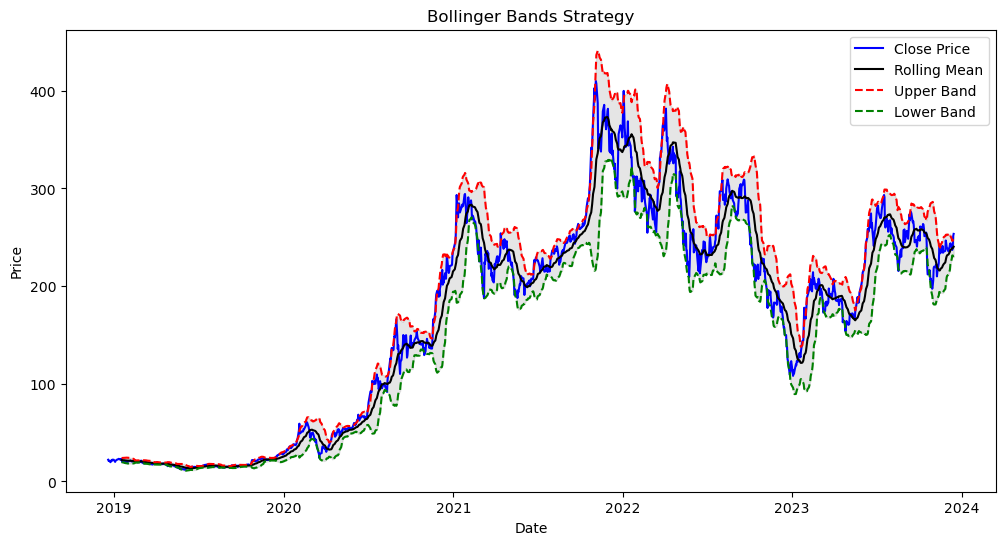

            Signal
Date              
2018-12-19     0.0
2018-12-20     0.0
2018-12-21     0.0
2018-12-24     0.0
2018-12-26     0.0
...            ...
2023-12-11     0.0
2023-12-12     0.0
2023-12-13     0.0
2023-12-14    -1.0
2023-12-15    -1.0

[1257 rows x 1 columns]


In [6]:
def fetch_data(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data

def calculate_bollinger_bands(data, window=20, num_std_dev=2):
    data['Rolling Mean'] = data['Close'].rolling(window=window).mean()
    data['Upper Band'] = data['Rolling Mean'] + (data['Close'].rolling(window=window).std() * num_std_dev)
    data['Lower Band'] = data['Rolling Mean'] - (data['Close'].rolling(window=window).std() * num_std_dev)
    return data

def plot_bollinger_bands(data):
    plt.figure(figsize=(12, 6))
    plt.plot(data['Close'], label='Close Price', color='blue')
    plt.plot(data['Rolling Mean'], label='Rolling Mean', color='black')
    plt.plot(data['Upper Band'], label='Upper Band', color='red', linestyle='dashed')
    plt.plot(data['Lower Band'], label='Lower Band', color='green', linestyle='dashed')
    plt.fill_between(data.index, data['Upper Band'], data['Lower Band'], color='gray', alpha=0.2)
    plt.title('Bollinger Bands Strategy')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

def bollinger_band_strategy(data):
    signals = pd.DataFrame(index=data.index)
    signals['Signal'] = 0.0

    # Buy Signal
    signals['Signal'][data['Close'] < data['Lower Band']] = 1.0

    # Sell Signal
    signals['Signal'][data['Close'] > data['Upper Band']] = -1.0

    return signals

if __name__ == "__main__":
    # Define the stock ticker, start date, and end date
    stock_ticker = 'TSLA'
    start_date = '2018-12-19'
    end_date = '2023-12-18'

    # Fetch historical stock data
    stock_data = fetch_data(stock_ticker, start_date, end_date)

    # Calculate Bollinger Bands
    stock_data = calculate_bollinger_bands(stock_data)

    # Plot Bollinger Bands
    plot_bollinger_bands(stock_data)

    # Generate signals based on Bollinger Bands
    signals = bollinger_band_strategy(stock_data)

    # Print signals
    print(signals)
